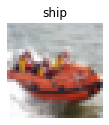

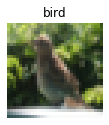

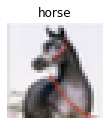

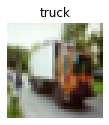

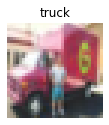

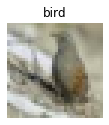

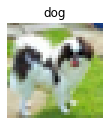

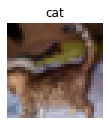

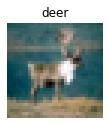

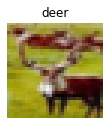

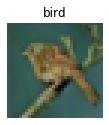

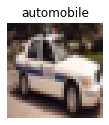

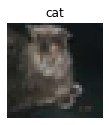

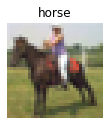

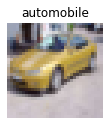

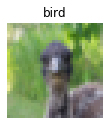

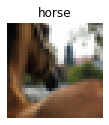

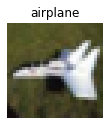

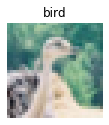

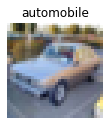

In [8]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

# CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Target classes: numbers to text
classes = {
  0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'
}

# Visualize 20 random samples
for i in np.random.randint(0, len(x_train)-1, 20):
    # Get data
    sample = x_train[i]
    target = y_train[i][0]
    # Set figure size and axis
    plt.figure(figsize=(1.75, 1.75))
    plt.axis('off')
    # Show data
    plt.imshow(sample)
    plt.title(f'{classes[target]}')
    #plt.savefig(f'./{i}.jpg')

In [10]:
#Reshape #normalization
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = (x_train_original, y_train_original), (x_test_original, y_test_original)
h = 32
b = 32
x_train = x_train.reshape(x_train.shape[0],h,b,3)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.reshape(x_test.shape[0],h,b,3)
x_test = x_test.astype('float32')
x_test /= 255

y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
#One-hot encoding
from keras.utils import to_categorical
num_classes = len(classes)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train

array([[[[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
    

In [114]:
#Model

from keras import models
from keras import layers
model2 = models.Sequential()
# keras.layers.Conv2D(filters, kernel_size... filter is how many filters (windows of sub pixel set) kernel is the window size eg: 3x3 pixels
model2.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3)))
model2.add(layers.MaxPool2D((2,2))) # Max Pooling to reduce the spatial dimensions of the output volume. pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal)
model2.add(layers.Conv2D(64,(3,3),activation='relu')) # does not need input_shape, since it gets it from previous layer
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='relu'))
model2.add(layers.Flatten()) # rewrite tensor to single vector of values
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax')) # softmax is good for output layer because Softmax outputs probabilities range. The range will 0 to 1, and the sum of all the probabilities will be equal to one. If the softmax function used for multi-classification model it returns the probabilities of each class and the target class will have the high probability.

model2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_15 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)              

In [115]:
#Train
model2.compile(loss='categorical_crossentropy', # loss is how to meassure how wrong the model is on its predictions
             optimizer='rmsprop', # "stochastic gradient descent" is a way to tell algorithm how to improve
             metrics=['accuracy'], # what do we care about in our model
             )
model2.fit(x_train,
         y_train,
         epochs=8,
         verbose=True,
         batch_size=64,
         validation_split=0.1) # checking periodically how well we are doing

Train on 45000 samples, validate on 5000 samples
Epoch 1/8
45000/45000 [==============================] - 17s 378us/step - loss: 1.6637 - accuracy: 0.4002 - val_loss: 1.3356 - val_accuracy: 0.5130
Epoch 2/8
45000/45000 [==============================] - 16s 366us/step - loss: 1.2759 - accuracy: 0.5500 - val_loss: 1.8513 - val_accuracy: 0.4416
Epoch 3/8
45000/45000 [==============================] - 16s 366us/step - loss: 1.0950 - accuracy: 0.6196 - val_loss: 1.1972 - val_accuracy: 0.5796
Epoch 4/8
45000/45000 [==============================] - 17s 374us/step - loss: 0.9769 - accuracy: 0.6584 - val_loss: 1.0837 - val_accuracy: 0.6084
Epoch 5/8
45000/45000 [==============================] - 17s 379us/step - loss: 0.8873 - accuracy: 0.6912 - val_loss: 1.0317 - val_accuracy: 0.6412
Epoch 6/8
45000/45000 [==============================] - 17s 383us/step - loss: 0.8112 - accuracy: 0.7162 - val_loss: 0.8706 - val_accuracy: 0.6998
Epoch 7/8
45000/45000 [==============================] - 17s 38

In [118]:
#Use a Sequential model from keras with multiple convolutional 2d layers to classify the cifar10 images.
results = model2.evaluate(x_test, y_test)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model2.predict(x_test[:3])
#print('predictions shape:', predictions.shape)
print(predictions)

print('predict classes',model2.predict_classes(x_test[:3]))
for cla in model2.predict_classes(x_test[:3]):
    print(classes.get(cla))
    
print('actual:\n',y_test[:3])

10000/10000 [==============================] - 1s 135us/step
test loss, test acc: [1.1165832384109498, 0.6394000053405762]

# Generate predictions for 3 samples
[[2.7850800e-04 6.1694307e-05 4.4957809e-03 7.6589674e-01 4.0641273e-04
  1.7350806e-01 4.0227666e-02 7.8653589e-05 1.5003047e-02 4.3558310e-05]
 [1.4267033e-02 5.2316617e-03 6.9409193e-06 2.4384467e-06 2.7619133e-06
  9.7935676e-08 2.2619462e-07 1.3843305e-07 9.8032653e-01 1.6219812e-04]
 [7.6544181e-02 2.3179483e-01 2.2487447e-03 2.1180448e-03 2.8525363e-04
  3.0316267e-04 1.4247483e-03 3.8012007e-04 6.7154115e-01 1.3359705e-02]]
predict classes [3 8 8]
cat
ship
ship
actual:
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
